# Data Visualization with matplotlib

Data visualization is an important part of any data science project. Whether you use it to give yourself a better understanding of the data that you're about to work with or to make your conclusions more digestible for others, data visualization can add clarity in a way that sheer rows and columns of data cannot.

## 0. Setup

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Import Data

The data we'll be working with comes from http://www.makeovermonday.co.uk/, a website that features weekly data visualization challenges in which they present a data visualization in a news article as well as the underlying data, and they give users a week to transform the visualization into something more interesting. In particular, we'll be working with prices of common holiday dinner foods found here: https://onedrive.live.com/view.aspx?resid=43EBDBC5D5265516!10892&ithint=file%2cxlsx&app=Excel&authkey=!AMjmJ1zXKzkIbKg

In [2]:
# Load the data from wherever you stored it, noting that we'll be using Product Family as our index column
food_data = pd.read_excel('Xmas Food Prices.xlsx', index_col = 'Product Family')

In [4]:
# Have a look at the first 5 rows
food_data.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Product Family,,,,,,,,,,,
Beers & Lagers,6.73,6.28,5.82,6.07,5.71,5.38,4.99,4.46,4.49,6.36,5.26
Blended Whisky,18.26,18.42,18.90,18.68,19.54,20.16,20.09,20.18,21.83,22.20,24.98
Brandy Butter,1.13,1.58,1.30,1.20,1.21,1.20,0.99,1.08,1.12,1.18,0.94
Brussels Sprouts,3.66,4.39,3.92,3.23,9.56,3.68,4.07,4.03,3.80,3.57,4.07
Carrots,2.79,2.96,2.22,1.99,2.20,2.07,2.16,1.98,2.18,2.09,2.04


## 2. Make a Scatter Plot

We'll start off by making a simple scatter plot. Let's say you're a whisky fan and you're concerned about the change in price over time. Let's create a scatter plot that shows years on the x-axis and whisky price on the y-axis to see if your concerns are valid.

In [5]:
# Create a list of years using the columns from your data
years = list(food_data)

# Select the whisky prices 
whisky = food_data.ix['Blended Whisky']

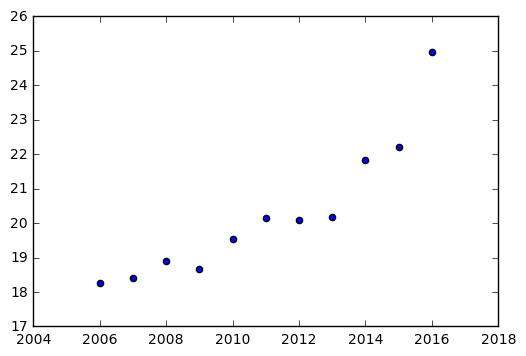

In [6]:
# Now make the scatter plot
plt.scatter(years, whisky)

You can now see that there is unfortunately a notable increase in whisky prices since 2006. That said, say you're also a big fan of parsnips. Let's have a look at a single plot combining both whisky and parsnip prices to see how they stack up.

In [8]:
# Create another set of data for parsnips
parsnips = food_data.ix['Parsnips']

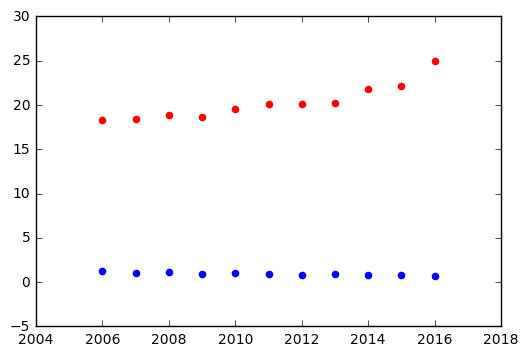

In [9]:
# There are lots of parameters you can use to spice up your visualizations.
# We'll use a simple one, noting the color that we want our different marks to be.
plt.scatter(years, whisky, color = 'red')
plt.scatter(years, parsnips, color = 'blue')
plt.show()

Good news! The price of parsnips is holding fairly steady. This is probably better for your long-term health than the whisky was anyway.

Now let's say you want to share this chart with your fellow whisky and parsnip-loving friends. There's some work to be done here if anyone else is going to understand this graphic on its own.

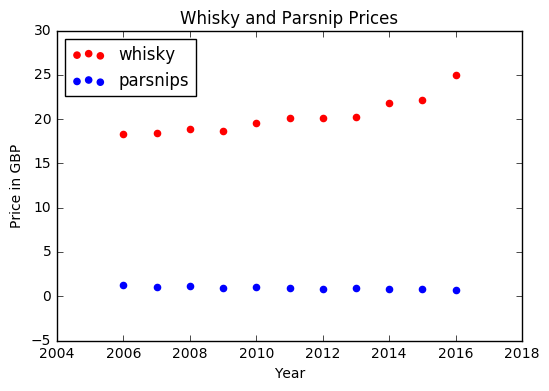

In [13]:
# Keep the data points as before, adding a label
plt.scatter(years, whisky, color = 'red', label = 'whisky')
plt.scatter(years, parsnips, color = 'blue', label = 'parsnips')

# Start off by giving it a title
plt.title("Whisky and Parsnip Prices")

# Give the x and y-axes labels
plt.xlabel('Year')
plt.ylabel('Price in GBP')

# Add a legend so it's clear which point is which
plt.legend(loc='upper left')

plt.show()

Much better! And that's only the beginning of what you can do. You could add more data, call out specific points, change the range of the axes, and plenty more.

## 3. Make a Bar Plot

Let's look at the data another way. Say that instead of looking at the price of a few items over time, you're interested in all the items for 2016. A scatter plot no longer makes much sense because the x-axis is a series of unordered food items instead of ordered years. A bar plot makes more sense in this situation.

In [18]:
# Not a necessary step, but a helpful one. This converts our column labels (like 2016) from integers to strings
food_data.columns = food_data.columns.astype(str)

# Let's have a look at just the data from 2016
year_data = food_data['2016']
year_data

Product Family
Beers & Lagers               5.26
Blended Whisky              24.98
Brandy Butter                0.94
Brussels Sprouts             4.07
Carrots                      2.04
Christmas Crackers          10.90
Cranberry Sauce              0.57
Fresh Turkey                 8.34
Frozen Carrots               1.21
Frozen Turkey                5.37
Gammons & Hams              26.46
Gravy                        1.21
Parsnips                     0.68
Pies                         1.81
Potatoes                     2.40
Red Wine                     5.75
Sponge Pudding               5.44
Stuffing                     5.98
Stuffing & Dumpling Mix      0.83
White Wine                   5.69
Totals                     119.94
Name: 2016, dtype: float64

This is a good start, albeit including some pretty strange food choices. We'll have a quick review of your pandas lesson to remove the final row of 'Totals' so that doesn't throw off the scale, then move forward with creating our graph.

In [22]:
# Remove the last row (row number -1 in python terms)
year_data = year_data[:-1]

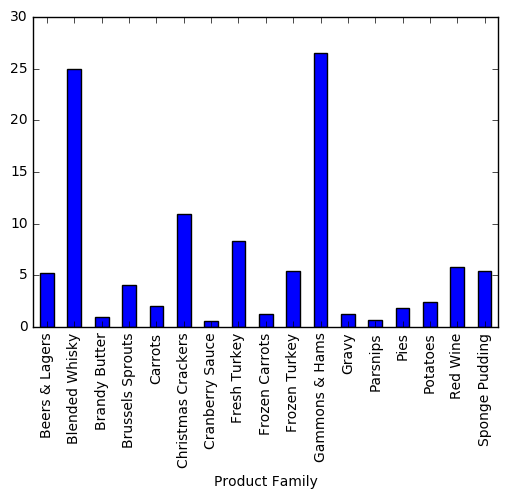

In [26]:
year_data.plot(kind='bar')

This isn't bad, but is also a little bit hard to read. Let's instead create a horizontal bar chart using "barh" instead of "bar"

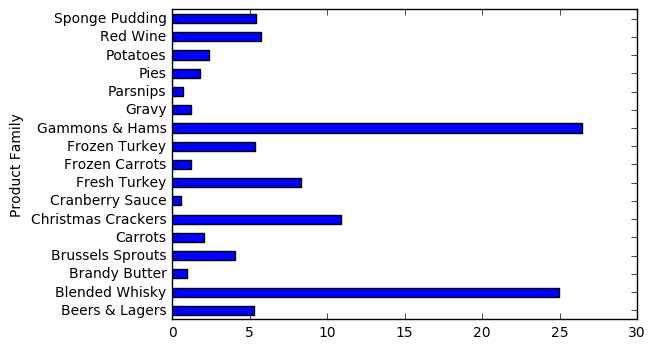

In [28]:
year_data.plot(kind='barh')

Just like we saw with the scatter plots, you have tons of options for adding style to your bar plots. You can add a title, labels, colors, and all sorts of other details in a similar way as before. You can search through the matplotlib website (http://matplotlib.org/1.2.1/index.html) for more information.

## 4. Make a Histogram

Now let's suppose you want to see how many items fall into different sets of price ranges. You can do this using a histogram, which is just as simple as the graphs we've seen above. Let's use the 2016 data again:

(array([ 9.,  5.,  1.,  0.,  1.,  1.]),
 array([ 0,  5, 10, 15, 20, 25, 30]),
 <a list of 6 Patch objects>)

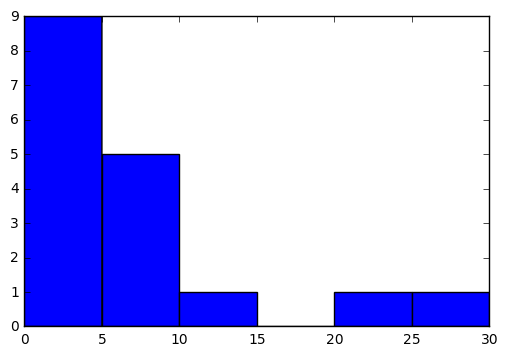

In [30]:
# The first parameter is the data; the second represents the ranges for your bins.
# Bin ranges can be equal as below or have any degree of separation you want.
plt.hist(year_data, bins=[0, 5, 10, 15, 20, 25, 30])

You can see that the vast majority of items fall within the cheapest bin, with a couple of outliers on the very expensive end.